In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('paper')

In [175]:
df = pd.concat([
    pd.read_csv('./accuracy-2020-05-04T01:31:19.081576.csv', index_col=0),
    pd.read_csv('./accuracy-2020-05-04T01:39:22.083753.csv', index_col=0),
    pd.read_csv('./accuracy-2020-05-04T02:03:14.881586.csv', index_col=0),
], ignore_index=True)
df['noise'] = 0.0
# csvs below have a noise column BUT its not correct should be 1
df_ = pd.concat([
    pd.read_csv('./accuracy-2020-05-04T04:18:56.754306.csv', index_col=0),
    pd.read_csv('./accuracy-2020-05-04T13:36:15.597392.csv', index_col=0),
    pd.read_csv('./accuracy-2020-05-04T14:30:19.164235.csv', index_col=0),
], ignore_index=True)
df_['noise'] = 1.0
df = pd.concat([df, df_], ignore_index=True)

df['experiment'] = df.index // 2
# csvs below have explicit experiment labels
#df_ = pd.concat([
#    pd.read_csv('./accuracy-2020-05-04T14:58:00.772105.csv', index_col=0), DO NOT USE
#])

#df = pd.concat([df, df_])
df.index

RangeIndex(start=0, stop=9880, step=1)

In [176]:
print(f"Collected data from {len(df)//2} experiments")

Collected data from 4940 experiments


In [177]:
model_groups = [df[['accuracy','experiment']]
                  .loc[idx]
                  .set_index('experiment')
                  .rename(columns={'accuracy': key})
                for key, idx in df.groupby('model').groups.items()]
experiment_groups = df.groupby('experiment').first().drop(columns=['model', 'accuracy'])
for model in model_groups:
    experiment_groups = experiment_groups.join(model)
experiment_groups['lp advantage'] = experiment_groups['linear program'] - experiment_groups['recursive logit']
experiment_groups['lp advantage ratio'] = experiment_groups['linear program'] / experiment_groups['recursive logit']

In [178]:
experiment_groups.head()

,n_nodes,n_edges,n_unique_training,noise,linear program,recursive logit,lp advantage,lp advantage ratio
experiment,,,,,,,,
0,12,64,1,0.0,0.469697,0.333333,0.136364,1.409091
1,12,64,2,0.0,0.507576,0.833333,-0.325758,0.609091
2,12,64,3,0.0,0.462121,0.795455,-0.333333,0.580952
3,12,64,4,0.0,0.462121,0.772727,-0.310606,0.598039
4,12,64,5,0.0,0.492424,0.893939,-0.401515,0.550847


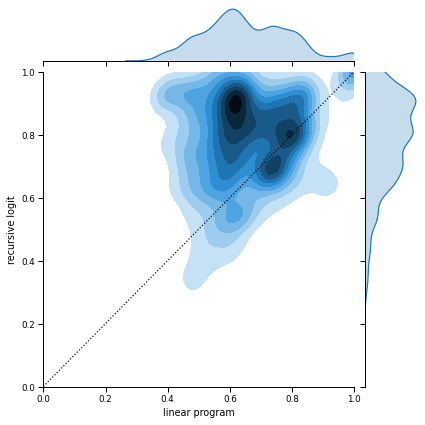

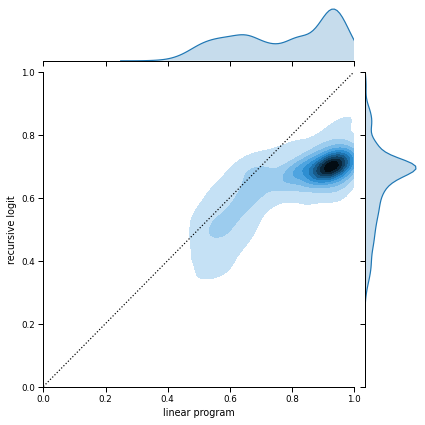

In [180]:
for noise in sorted(experiment_groups.noise.unique()):
    g = sns.jointplot('linear program', 'recursive logit',
                      data=experiment_groups[experiment_groups.noise==noise],
                      kind='kde',
                      shade_lowest=False,
                      xlim=[0,1],
                      ylim=[0,1],
                     )
    #g.ax_joint.set_title(f"noise level = {noise}")
    g.ax_joint.plot([0,1], [0,1], linestyle='dotted', color='k')

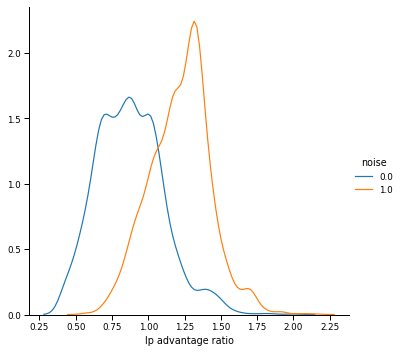

In [189]:
g = (sns.FacetGrid(experiment_groups, hue='noise', height=5)
        .map(sns.distplot, "lp advantage ratio", hist=False, rug=False)
        .add_legend()
    )

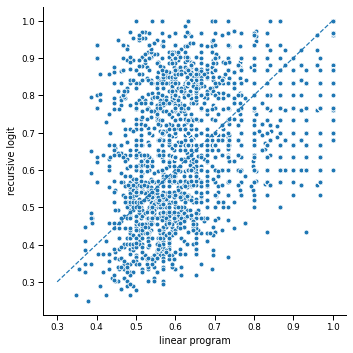

In [182]:
sns.relplot('linear program', 'recursive logit',
            data=experiment_groups, height=5)
plt.plot([0.3, 1], [0.3, 1], '--')
None

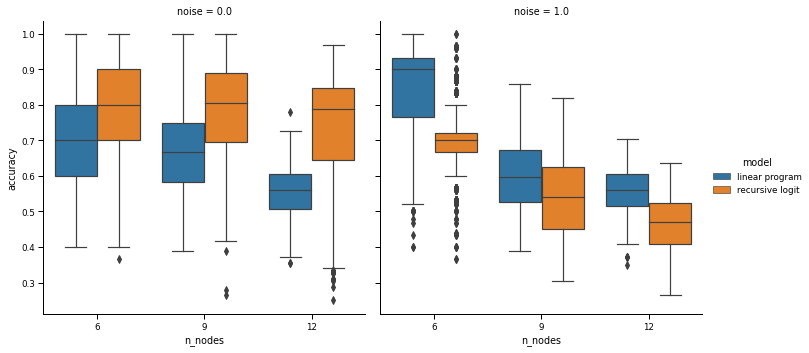

In [183]:
sns.catplot(x='n_nodes', y='accuracy',  
            hue='model',
            kind='box',
            col='noise',
            data=df)

In [186]:
df_large = df[df.n_nodes>=12]

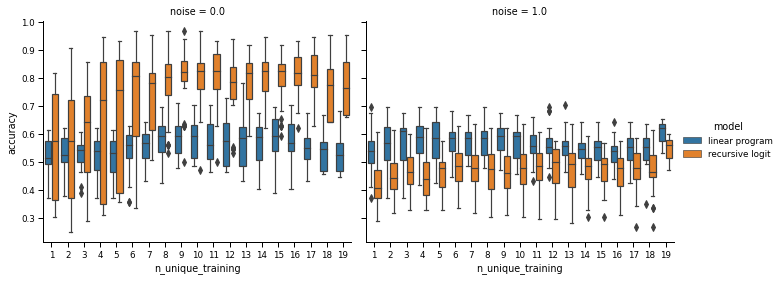

In [187]:
sns.catplot(x='n_unique_training', y='accuracy',
           hue='model',
           kind='box',
            #col='n_nodes',
            col='noise',
           data=df_large,
           height=4, aspect=1.2)